In [1]:
import pandas as pd
from config import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

features = pd.read_parquet(FEATURES_DIR / "features.pq")
features

,participant_id,EVIL_BASTARD_mean_peak_velocity_sacc,EVIL_BASTARD_mean_amplitude_sacc,EVIL_BASTARD_mean_duration_sacc,EVIL_BASTARD_mean_duration_fix,EVIL_BASTARD_mean_pupil_size_fix,EVIL_BASTARD_fixation_distance_mean,EVIL_BASTARD_fixation_distance_std,EVIL_BASTARD_total_acceleration_magnitude_left_mean,EVIL_BASTARD_total_acceleration_magnitude_left_min,...,EVIL_BASTARD_distance_to_fixpoint_x_min,EVIL_BASTARD_distance_to_fixpoint_x_max,EVIL_BASTARD_distance_to_fixpoint_x_median,EVIL_BASTARD_distance_to_fixpoint_x_std,EVIL_BASTARD_distance_to_fixpoint_y_mean,EVIL_BASTARD_distance_to_fixpoint_y_min,EVIL_BASTARD_distance_to_fixpoint_y_max,EVIL_BASTARD_distance_to_fixpoint_y_median,EVIL_BASTARD_distance_to_fixpoint_y_std,y
0,106,116.038585,1.584904,32.110932,843.723054,767.543413,161.574760,162.041200,1268.603058,0.0,...,0.000,133882.810,993.505,2272.786029,1015.882525,0.020,217622.250,603.9050,3217.218484,1
1,111,103.167702,1.277267,25.541408,516.936634,500.387129,116.577242,153.396691,1221.966845,0.0,...,13.385,35569.025,4324.820,2893.770694,2090.376817,0.005,81910.440,1197.1250,3225.645126,0
2,133,188.970779,1.549501,197.035714,642.496100,737.018721,147.488950,161.270651,1510.381772,0.0,...,0.000,8433216.000,1750.515,30906.972248,2476.758494,0.000,2876755.210,849.4100,21115.902463,1
3,134,128.344882,1.766840,46.557480,769.863299,478.424963,164.937286,199.863372,2399.475077,0.0,...,0.000,19253.810,1802.770,1597.145136,1664.373394,0.000,29360.825,1230.4800,1629.242563,0
4,135,327.098326,2.458905,106.974895,1040.525813,1289.015296,225.580855,259.891636,1702.245618,0.0,...,0.160,2190430.205,1583.465,52636.641411,1350.173777,0.005,810000.000,734.9800,6991.459789,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,399,120.522995,1.278930,52.648128,497.850000,987.452041,118.049827,129.531796,1523.804878,0.0,...,0.010,3295677.160,2012.690,8650.326654,1823.283242,0.005,223256.250,1229.6000,3276.581433,0
156,401,183.789352,1.975907,108.430556,1012.086134,1093.014706,220.556221,218.793642,2217.161061,0.0,...,0.000,208483.560,2139.945,2609.691954,1408.061533,0.000,332698.240,743.3000,7272.424432,0
157,402,141.332500,1.614175,51.842500,565.250000,587.212264,147.855456,184.341738,1635.805030,0.0,...,0.810,131696.410,1416.740,3250.679263,753.149846,0.000,198737.640,345.4100,2905.878664,0
158,403,106.698842,1.721236,24.488417,919.809947,899.969805,204.802561,203.165798,1237.499786,0.0,...,405.865,32496.985,3020.570,2849.886269,7849.020933,2364.125,32041.000,7142.8075,2853.491895,0


In [2]:
control = features.query('y==0')
patient = features.query('y==1')
sig_features = []

for feature in features.columns:
    if feature in ["participant_id", 'y']:
        continue
    t_stat, p_value = stats.ttest_ind(control[control[feature].notna()][feature], patient[patient[feature].notna()][feature])
    alpha = 0.05
    if alpha > p_value:
        print(f"{feature}:\t\t{p_value}")
        sig_features.append(feature)
        
sig_features


EVIL_BASTARD_mean_duration_sacc:		0.013413105375188934
EVIL_BASTARD_total_acceleration_magnitude_right_max:		0.04631511063449345
EVIL_BASTARD_total_acceleration_magnitude_right_median:		0.0036595857266217367
EVIL_BASTARD_distance_to_fixpoint_max:		0.002453396640184364
EVIL_BASTARD_distance_to_fixpoint_x_max:		0.0030710898632994718
EVIL_BASTARD_distance_to_fixpoint_y_max:		0.016700792355257107


['EVIL_BASTARD_mean_duration_sacc',
 'EVIL_BASTARD_total_acceleration_magnitude_right_max',
 'EVIL_BASTARD_total_acceleration_magnitude_right_median',
 'EVIL_BASTARD_distance_to_fixpoint_max',
 'EVIL_BASTARD_distance_to_fixpoint_x_max',
 'EVIL_BASTARD_distance_to_fixpoint_y_max']

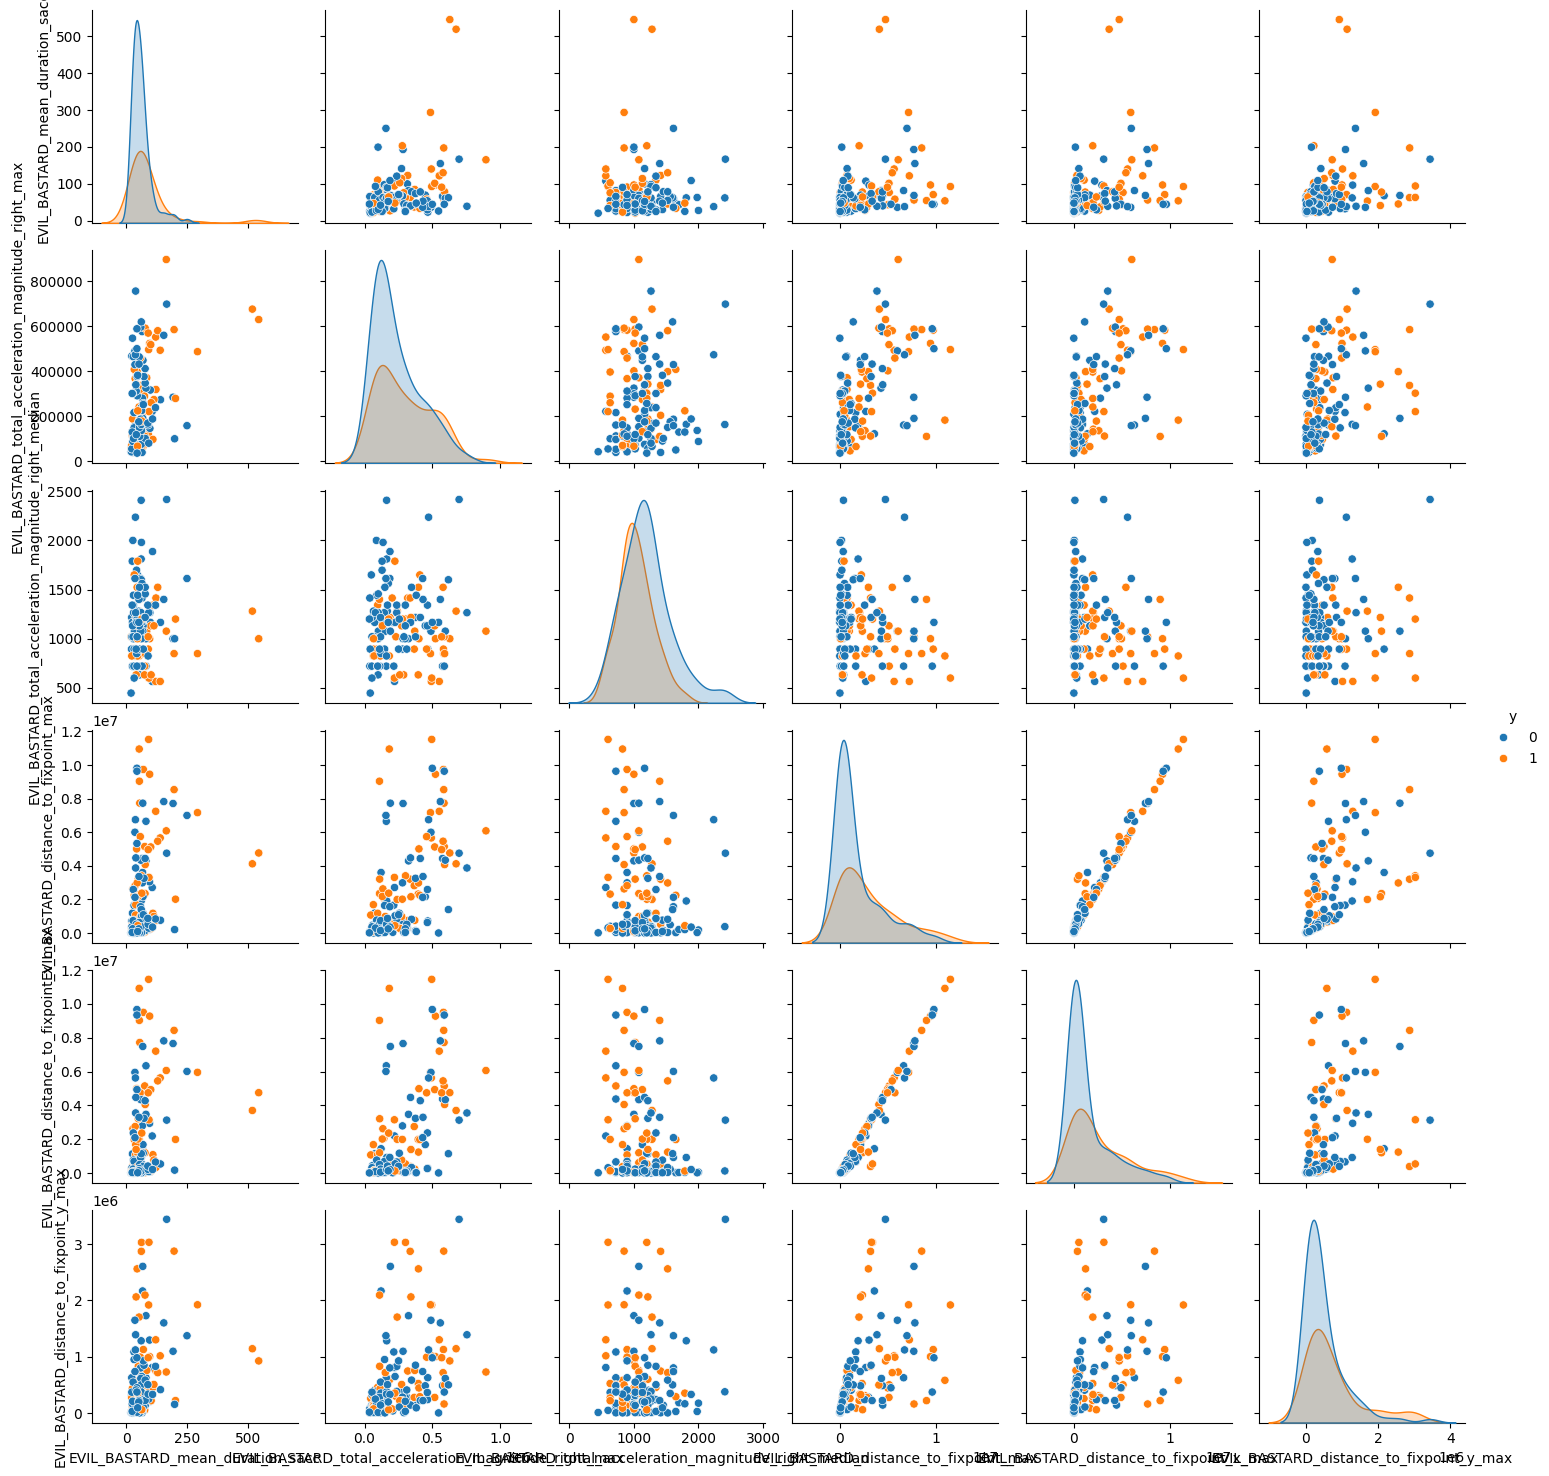

In [7]:
sns.pairplot(features[sig_features + ['y']], hue='y')